In [56]:
import os, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Tensorflow (native and Horovod):
- 200 epochs with lr scheduling and linear scaling rule 

In [57]:
path_1 ='../logs' 

In [58]:
names = sorted(os.listdir(path_1))  
names = [i for i in names if i[:8] != 'log_hvd_']
names

['log_1.csv',
 'log_10.csv',
 'log_12.csv',
 'log_14.csv',
 'log_2.csv',
 'log_4.csv',
 'log_6.csv',
 'log_8.csv']

- Left: loss as a function of epoch, Right: loss as a function of accumulated time to converge

log_1.csv
log_10.csv
log_12.csv
log_14.csv
log_2.csv
log_4.csv
log_6.csv
log_8.csv


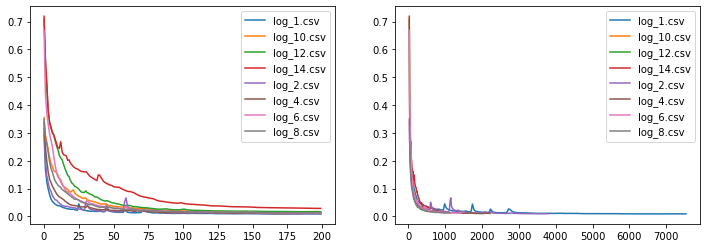

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
for i,name in enumerate(names):
    print(name)
    
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0, on_bad_lines='skip')
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

- Total training time vs test time change

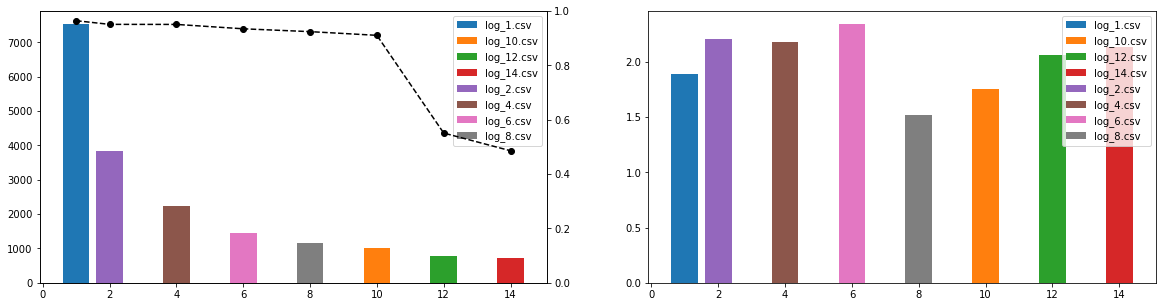

In [64]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax3 = ax1.twinx()
iou =[]
for i,name in enumerate(names):

    
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    
    iou.append([int(name[4:-4]),Df.iou[0]])
   
    ax1.bar(int(name[4:-4]), Df.training_time[0], label=name)
    ax2.bar(int(name[4:-4]), Df.test_time[0], label=name)

iou = np.array(iou)
iou = iou[np.argsort(iou, axis=0)[:,0]]
ax3.plot(iou[:,0], iou[:,1], 'ko--')
ax3.set_ylim([0,1])

ax1.legend()
ax2.legend()


In [67]:
time_per_epoch = []
iou = []
for i,name in enumerate(names):
            
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    time_per_epoch.append([int(name[4:-4]),Df.time_per_epoch[1]])
    iou.append([int(name[4:-4]),Df.iou[199]])

time_per_epoch = sorted(time_per_epoch,key=lambda x: x[0]) 
time_per_epoch = np.array(time_per_epoch)

iou = sorted(iou,key=lambda x: x[0]) 
iou = np.array(iou)


In [68]:
t0 = time_per_epoch[0][1]
x = time_per_epoch[:,0].astype(int) 

total_t = time_per_epoch[:,1]


speedup_1= [t0/i  for i in  total_t]
linear= [t0/i  for i in  x]
speedup_2= [t0/i  for i in  linear]

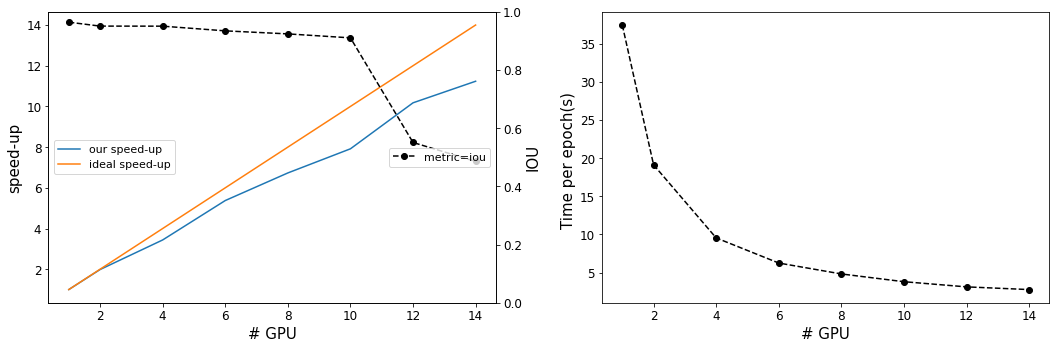

In [69]:
fig, (ax1,ax3) = plt.subplots(nrows=1, ncols=2,figsize=(16,6))

ax2 = ax1.twinx()

fig.tight_layout(pad=6.0)


ax1.plot(x, speedup_1, label='our speed-up')
ax1.plot(x, speedup_2, label='ideal speed-up')
ax2.plot(iou[:,0], iou[:,1], 'ko--', label='metric=iou')
ax2.set_ylim([0,1])
ax1.legend(loc='center left', fontsize=11)
ax2.legend(loc='center right', fontsize=11)
ax1.set_xlabel("# GPU", fontsize=15)
ax1.set_ylabel("speed-up", fontsize=15)
ax2.set_ylabel("IOU", fontsize=15)

ax3.plot(x, sp[:,1], 'ko--')
ax3.set_xlabel("# GPU", fontsize=15)
ax3.set_ylabel("Time per epoch(s) ", fontsize=15)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
ax3.tick_params(axis='both', labelsize=12)